<a href="https://colab.research.google.com/github/Numenns/Quantum-Machine-Learning-QML-/blob/main/QSVC_using_Qiskit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset from a CSV file
from google.colab import drive
drive.mount('/gdrive')
ruta = '/gdrive/MyDrive/Colab Notebooks/QML/customer_data_plus.csv'
df = pd.read_csv(ruta)

# Display the first few rows of the dataset
print("First Few Rows of the Dataset:")
print(df.head())

# Summarize the dataset
print("\nSummary Statistics:")
print(df.describe())

# Define X and y
X = df.drop(columns=["Customer_ID", "Defaulted"])  # Drop ID and target
y = df["Defaulted"]  # Keep only the target variable

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
First Few Rows of the Dataset:
  Customer_ID  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0  CST_000001  40.967142  34.617357  42.476885  51.230299  33.658466   
1  CST_000002  54.656488  37.742237  40.675282  25.752518  34.556173   
2  CST_000003  57.384666  51.713683  48.843517  46.988963  35.214780   
3  CST_000004  40.208258  43.143410  33.936650  33.037934  53.125258   
4  CST_000005  47.803281  53.571126  64.778940  44.817298  41.915064   

   Feature_6  Feature_7  Feature_8  Feature_9  ...  Feature_12  Feature_13  \
0  33.658630  51.792128  43.674347  31.305256  ...   31.342702   38.419623   
1  41.109226  28.490064  43.756980  33.993613  ...   58.522782   39.865028   
2  42.801558  45.393612  60.571222  53.436183  ...   46.149177   43.230780   
3  58.562400  44.279899  55.035329  48.616360  ...   60.380366   44.641740   
4  44.982430  59.154021  53.287

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets first
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Standardize features separately for training and testing sets
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA only on the training data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform the test data using the PCA fitted on the training set
X_test_pca = pca.transform(X_test_scaled)

# Display a summary of the PCA results
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.25437127, 0.05324604])

In [ ]:
#pip install qiskit-machine-learning matplotlib

In [ ]:
#pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=942fd5dabd11bb68acdef1b8e963eec35869d77e59c8b2f7b6cfd9eb2ce4422b
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


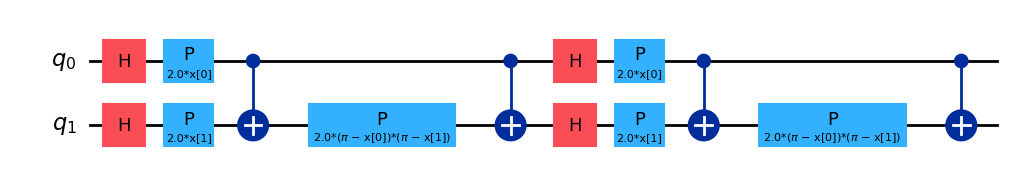

In [ ]:
from qiskit.circuit.library import ZZFeatureMap
from qiskit.visualization import circuit_drawer

# Define a 2-qubit feature map with more details
feature_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement='linear')

# Decompose the feature map to show detailed gates
detailed_feature_map = feature_map.decompose()

# Draw the detailed feature map circuit
detailed_feature_map.draw(output='mpl')

In [ ]:
from qiskit_machine_learning.kernels import FidelityStatevectorKernel
from qiskit_machine_learning.algorithms.classifiers import QSVC

# Define the quantum kernel using the feature map
quantum_kernel = FidelityStatevectorKernel(feature_map=feature_map)

# Initialize and train the QSVC
model = QSVC(quantum_kernel=quantum_kernel, probability=True)
model.fit(X_train_pca, y_train)

# Make predictions
y_pred = model.predict(X_test_pca)
y_pred_proba = model.predict_proba(X_test_pca)[:, 1]  # Get probabilities for the positive class

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, roc_curve
import numpy as np

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

# Calculate KS statistic
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
ks = np.max(tpr - fpr)

# Classification report
class_report = classification_report(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc:.4f}")
print(f"KS Statistic: {ks:.4f}")
print("Classification Report:\n", class_report)

Accuracy: 0.9400
AUC: 0.9590
KS Statistic: 0.9000
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       100
           1       0.96      0.92      0.94       100

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200

